In [1]:
import pandas as pd
from pandas import DataFrame
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
#Scaper des mots racistes à partir du site web slur contenant plus 2000 mots racistes de plusieurs nationalités
#Il y a un seul tableau : [0]
df = pd.read_html("http://www.rsdb.org/full")[0]
del df['Represents']
del df['Reason & Origins']
df.to_csv("racistes.csv")

In [3]:
#Un apperçu du fichier conteant que des mots racistes
df=pd.read_csv("racistes.csv")
df.head()

,Unnamed: 0,Slur
0,0,10% Off
1,1,51st Stater
2,2,539
3,3,7-11
4,4,8 Mile


In [6]:
#Read the csv file contenant les tweets
#nous avons juste besoin la colonne contenant les tweet_clan: On a supprimé le reste des colonnes
df=pd.read_csv("train_clean_WITH_STOPWORDS_NO_HASTAGWORD.csv")
del df['Unnamed: 0']
del df['id']
del df['label']
del df['tweet']
df.head()

df.to_csv("data.csv")
df.head()

,tweet_clean
0,when a father be dysfunctional and be so selfi...
1,thanks for credit i can not use cause they don...
2,bihday your majesty
3,i love you take with you all the time in ur
4,factsguide society now


In [7]:
# Extraire les mots pour chaque tweet dans mon fichier data.csv qui contiient le data set pour le scoring
def extract_word(filename):
    df = pd.read_csv(filename, delimiter=',')
    list_of_row=[row[1] for row in df.values]
    word_list=[]
    for item in list_of_row:
        for word in str(item).split(' '):
            word_list.append(word.lower())
    return word_list



In [8]:
# Creer la liste en 2_gram du data set de training car notre dictionnaire est composé d'un mot et des groupes de 2 mots
def extract_ngram(filename,numb):
    df = pd.read_csv(filename, delimiter=',')
    list_of_row=[row[1] for row in df.values]
    word_list=[]
    bi=[]
    for item in list_of_row:
        for word in str(item).split(' '):
            word_list.append(word.lower())
        
    bigrame=ngrams(word_list,numb)
    bi= [' '.join(grams) for grams in bigrame]
    return bi

#Example with some tweets
data2=extract_ngram("textes.csv",2)
print(data2)


['when a', 'a father', 'father be', 'be dysfunctional', 'dysfunctional and', 'and be', 'be 925', '925 so', 'so selfish', 'selfish he', 'he drag', 'drag hi', 'hi kid', 'kid into', 'into hi', 'hi dysfunction', 'dysfunction 51st', '51st stater', 'stater does', 'does 925', '925 canadian']


In [9]:
#Creer la liste de mots raciste et enlever les stop_words et certains mots comme des verbes, des fruits
#Et transformer les mots en miniscule car notre data set training est constitué de lettres miniscules
def racit_sen(filename):
    d = pd.read_csv(filename, delimiter=',')
    list_of_rowr=[row[1] for row in d.values]
    stop_words=(stopwords.words("english"))
    stopw=['alphabet','apple','snow','safe','saw','Vanilla Ice','vanilla','smoke','skype','shoe','oreo','data','diesel','cook','natasha','monday','coca','coconut','canadian']
    stopw1=['cold drink','pancake','banana','milk','canal','pineapple','paragraph','pizza','random','blood','brew','butter','boy','burger','chic','captain','cabbage','cancer','charlie','brother','cold drink','chief']
    stop_words.extend(stopw)
    stop_words.extend(stopw1)
    #print(stop_words)
    #print(list_of_rowr)
    list_row=[]
    listew=[]
    for l in list_of_rowr:
        listew.append(l.lower())
    print("Un exmple de notre dictionnaire avec quelques mots")
    print(listew)
    for word in listew:
        words=word_tokenize(word)
        for w in words:
            if (w not in stop_words):
                list_row.append(word)
    for l in list_row:
        if list_row.count(l)>=2:
            list_row.remove(l)
    return list_row
        



sen=racit_sen("texte.csv")
print("Après transformation")
print(sen)

Un exmple de notre dictionnaire avec quelques mots
['10%  off', '51st stater', '539', 'apple', '7-11', '8 mile', 'does', 'ours', 'canadian', '925 ', 'chic', 'blood']
Après transformation
['10%  off', '51st stater', '539', '7-11', '8 mile', '925 ']


In [10]:
#Combiner les liste 1_gram et 2_gram du data set training
def combiner_data(filename):
    data1=extract_word(filename)
    data2=extract_ngram(filename,2)
    for d in data2:
        data1.append(d)
    return data1

#Exemple
data=combiner_data("textes.csv")
print(data)


['when', 'a', 'father', 'be', 'dysfunctional', 'and', 'be', '925', 'so', 'selfish', 'he', 'drag', 'hi', 'kid', 'into', 'hi', 'dysfunction', '51st', 'stater', 'does', '925', 'canadian', 'when a', 'a father', 'father be', 'be dysfunctional', 'dysfunctional and', 'and be', 'be 925', '925 so', 'so selfish', 'selfish he', 'he drag', 'drag hi', 'hi kid', 'kid into', 'into hi', 'hi dysfunction', 'dysfunction 51st', '51st stater', 'stater does', 'does 925', '925 canadian']


In [12]:
import pandas as pd
import nltk
from nltk.util import ngrams
#Calculer la frequence des mots raciste(racistes.csv) dans le data set de training(data.csv)
def frequence_word(donnees,wordracist):
    data=combiner_data(donnees)
    race=racit_sen(wordracist)
    dictionnaire={}
    for sen in race:
        if sen in data:
            n=data.count(sen)
            dictionnaire[sen]=n
    return dictionnaire


In [13]:
#Recuperer le mot raciste ayant la plus grande frequence
def keywithmaxval(d): 
    v=list(d.values())
    k=list(d.keys())
    return k[v.index(max(v))]

In [14]:
#Recupérer le mot raciste le moins utilisé dans les tweets
def keywithminval(d): 
    v=list(d.values())
    k=list(d.keys())
    return k[v.index(min(v))]

corpus=frequence_word("data.csv","racistes.csv")
#print(corpus)
print("le mot le moins utulisé est:",keywithminval(corpus))
n=keywithminval(corpus)
nombr=corpus[n]
print("sa valeur est :",corpus[n])
print("le mot le plus utulisé est:",keywithmaxval(corpus))
m=keywithmaxval(corpus)
nombre=corpus[m]
print("sa valeur est :",corpus[m])

Un exmple de notre dictionnaire avec quelques mots
['10% off', '51st stater', '539', '7-11', '8 mile', '925', 'a.i.', 'aa', 'abba-dabba', 'abc', 'abc', 'abcd', 'abco', 'abdul', 'abe lincoln', 'abeed', 'abi-dabi', 'abo', 'ace of spades', 'adolf', 'african', "african't", 'africoon', 'afro', 'afro-saxon', 'agent orange', 'ahab', 'aibu', 'ainu', 'akata', 'aladdin', 'albino', 'albo', 'alcoholic', 'alphabet', 'ame-koh', "american't", 'americoon', 'americunt', 'amerikkkan', 'amerikos', 'amf', 'ami', 'amigo', 'anchor baby', 'ancient chinese secret', 'angie', 'anglo', 'angus', 'ant', 'antique farm equipment', 'ape', 'apna', 'apple', 'apple', 'apu', 'ararat', 'aravi', 'arf', 'argie', 'arm pits', 'armo', 'aryan', 'ashy', 'atta', 'aunt jemima', 'ayatollah', 'azn', 'babar', 'baboomba', 'baboon', 'babu', 'baby-muncher', 'bacardi', 'bacon bits', 'bagel-dog', 'bahadur', 'bai tou', 'baijo', 'bak guiy', 'balsero', 'balt', 'baluba', 'baluga', 'bamboo coon', 'ban', 'banana', 'banana bender', 'bananame', '

le mot le moins utulisé est: aa
sa valeur est : 1
le mot le plus utulisé est: still
sa valeur est : 326


In [15]:
import pandas as pd
#Scoring des mots raciste en pourcentage, divisant leur frequence avec le plus grand puis les multiplié par 100
def scoring_word(filename1,filename2):
    corpus=frequence_word(filename1,filename2)
    n=keywithmaxval(corpus)
    nombr=corpus[n]
    for key in corpus.keys():
        i=corpus[key]
        corpus[key]=(i/nombr)*100
    return corpus
    


In [16]:
#Pour finir exporter notre dictionnaire de mots racistes avec leur score dans un fichier csv et excel du nom de dictionnaire 343 words
dico=scoring_word("data.csv","racistes.csv")
df=DataFrame(list(dico.items()),columns = ['N_gramWord','Score'])
df.head()
df.to_csv("dictionnary.csv")
df.to_excel("dictionnary.xlsx")

Un exmple de notre dictionnaire avec quelques mots
['10% off', '51st stater', '539', '7-11', '8 mile', '925', 'a.i.', 'aa', 'abba-dabba', 'abc', 'abc', 'abcd', 'abco', 'abdul', 'abe lincoln', 'abeed', 'abi-dabi', 'abo', 'ace of spades', 'adolf', 'african', "african't", 'africoon', 'afro', 'afro-saxon', 'agent orange', 'ahab', 'aibu', 'ainu', 'akata', 'aladdin', 'albino', 'albo', 'alcoholic', 'alphabet', 'ame-koh', "american't", 'americoon', 'americunt', 'amerikkkan', 'amerikos', 'amf', 'ami', 'amigo', 'anchor baby', 'ancient chinese secret', 'angie', 'anglo', 'angus', 'ant', 'antique farm equipment', 'ape', 'apna', 'apple', 'apple', 'apu', 'ararat', 'aravi', 'arf', 'argie', 'arm pits', 'armo', 'aryan', 'ashy', 'atta', 'aunt jemima', 'ayatollah', 'azn', 'babar', 'baboomba', 'baboon', 'babu', 'baby-muncher', 'bacardi', 'bacon bits', 'bagel-dog', 'bahadur', 'bai tou', 'baijo', 'bak guiy', 'balsero', 'balt', 'baluba', 'baluga', 'bamboo coon', 'ban', 'banana', 'banana bender', 'bananame', '

In [17]:
#fonction pour recupérer le score de mots racistes et son nombre dans chaque tweet avec une liste 
#vu on prend une liste pour chaque tweet tranformé en 1 et 2 grams 
#Transformer les mots et leur score en dictionnaire
def ungram(liste):
    df = pd.read_csv('dictionnary.csv', delimiter=',')
    del df['Unnamed: 0']
    dic=df.set_index('N_gramWord')['Score'].to_dict()
    scr=0
    nbre=0
    for w in liste:
        if w in dic:
            #print(w)
            #print(dic[w])
            nbre=nbre+1
            scr=scr+dic[w]
    return (scr,nbre)

essai=['when', 'a', 'father', 'be', 'dysfunctional', 'and', 'be', 'so', 'selfish', 'he', 'drag', 'hi', 'kid', 'into', 'hi', 'dysfunction', 'thanks', 'for', 'credit', 'i', 'can', 'not', 'use', 'cause', 'they', 'don', 'not', 'offer', 'wheelchair', 'van', 'in', 'pdx', 'bihday', 'your', 'majesty', 'nigger', 'albino', 'i', 'love', 'you', 'take', 'with', 'you', 'all', 'the', 'time', 'in', 'ur', '', 'factsguide', 'society', 'now', 'bear', '925', 'huge', 'fan', 'fare', 'and', 'big', 'talk', 'before', 'they', 'leave', 'chaos', 'and', 'pay', 'dispute', 'when', 'they', 'get', 'there', 'camp', 'tomorrow', 'danny', '', 'the', 'next', 'school', 'year', 'be', 'the', 'year', 'for', 'exams', 'can', 'not', 'think', 'about', 'that', '', 'we', 'win', 'love', 'the', 'land', '', 'welcome', 'here', 'i', 'be', 'it', 'be', 'so', '', 'consumer', 'price', 'index', 'mom', 'climb', 'from', 'previous', 'to', 'in', 'may', 'we', 'be', 'so', 'selfish', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', 'call', 'middle', 'school', 'build', 'the', 'wall', 'chant', 'no', 'comment', 'in', '10%', 'off', '51st', 'stater', '8', 'mile', 'abdul', 'update']
score=ungram(essai)
print(score)

(87.11656441717793, 3)


In [18]:
import pandas as pd
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
def score_tweet(filename):
    d = pd.read_csv(filename, delimiter=',')
    list_of_row=[row[1] for row in d.values]
    ngram_word=[]
    score={}
    nbre_rac={}
    classifier={}
    print(list_of_row)
    for item in list_of_row:
        #print(item)
        word_list=[]
        for word in str(item).split(' '):
            word_list.append(word)
        #print(word_list)
        bigrame=ngrams(word_list,2)
        bi= [' '.join(grams) for grams in bigrame]
        word_list.extend(bi)
        scruni,nbr=ungram(word_list)
        score[item]=scruni
        nbre_rac[item]=nbr
        if(nbre_rac[item] >= 2) or (score[item]>=0.3):
            classifier[item]="Racist Tweet"
        else:
            classifier[item]="Not Racist Tweet"
    return score,classifier,nbre_rac



['when a father be dysfunctional and be so selfish he drag hi kid into hi dysfunction', 'thanks for credit i can not use cause they don not offer wheelchair van in pdx', 'bihday your majesty', 'i love you take with you all the time in ur ', 'factsguide society now', 'huge fan fare and big talk before they leave chaos and pay dispute when they get there', 'camp tomorrow danny ', 'the next school year be the year for exams can not think about that ', 'we win love the land ', 'welcome here i be it be so', ' consumer price index mom climb from previous to in may', 'we be so selfish', 'i get to see my daddy today', 'call middle school build the wall chant', 'no comment in', 'ouch junior be angry ', 'i be thankful for have a paner', 'retweet if you agree', 'it smile all around via ig user make people', 'a we all know essential oil be not make of chemical', 'people blame ha for conceded goal be it fat rooney who give away free kick know bale can hit them from there', 'sad little dude', 'produ

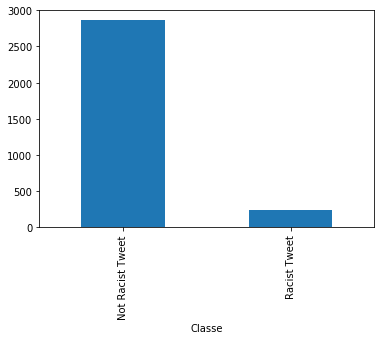

In [19]:
#Dans analyse.csv, il ya 10% du data set pour tester notre dictionnaire
#Et on met les résultats: le tweet, son score de mots raciste et sa classe: racist or not racist
scr_tweet,classe,nombre=score_tweet("analyse.csv")


df=DataFrame(list(scr_tweet.items()),columns = ['tweet','Score_Word_Raciste'])
df['Classe']= df['tweet'].map(classe)

df.describe()
#df.to_csv("classifier.csv")


df.groupby('Classe')['tweet'].nunique().plot(kind='bar')
plt.show()



In [20]:
#Voir les résultats
df = pd.read_csv("classifier.csv", delimiter=',')
df.describe()
df['Classe'].value_counts()

Not Racist Tweet    2862
Racist Tweet         239
Name: Classe, dtype: int64